# Set Parameter
- Attention = Luong
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 32
- Drop out = 0.2
- Hidden unit = 50
- Epochs = 50
- N = [60, 200, 20]
- Data = 10K
- Deduplication & Random Split

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

from trainer.supervised_trainer import SupervisedTrainer
from models.encoderRNN import EncoderRNN
from models.decoderRNN import DecoderRNN
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from optim.optim import Optimizer
from dataset import fields
from evaluator.predictor import Predictor

import matplotlib.pyplot as plt

/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
N = list(range(60, 201, 20))
character_error_rate = []
sentance_error_rate = []
print(N)

[60, 80, 100, 120, 140, 160, 180, 200]


# Prepare dataset

N : 60


/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-02-27 12:16:14,206 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-02-27 12:17:15,232 INFO   Finished epoch 1: Train loss: 14.4304,

N : 80


2019-02-27 13:08:16,874 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 13:09:36,520 INFO   Finished epoch 1: Train loss: 17.5293, Dev loss: 15.3979, Accuracy(Character): 0.1147, Accuracy(Word): 0.0000
2019-02-27 13:10:55,846 INFO   Finished epoch 2: Train loss: 14.1542, Dev loss: 14.7371, Accuracy(Character): 0.1190, Accuracy(Word): 0.0000
2019-02-27 13:12:16,269 INFO   Finished epoch 3: Train loss: 13.7165, Dev loss: 33.3711, Accuracy(Character): 0.1303, Accuracy(Word): 0.0000
2019-02-27 13:13:34,546 INFO   Finished epoch 4: Train loss: 14.5134, Dev loss: 30.7102, Accuracy(Character): 0.1969, Accuracy(Word): 0.0000
2019-02-27 13:14:51,181 INFO   Finished epoch 5: Train loss: 11.9378, Dev loss: 138.8830, Accuracy(Character): 0.1336, Accuracy(Word): 0.0000
2019-02-27 13:16:10,099 INFO   Finished epoch 6: Train loss: 11.4944, Dev loss: 10.2237, Accuracy(Character): 0.2562

N : 100


2019-02-27 14:14:59,914 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 14:16:40,485 INFO   Finished epoch 1: Train loss: 19.9292, Dev loss: 17.8208, Accuracy(Character): 0.0932, Accuracy(Word): 0.0000
2019-02-27 14:18:13,624 INFO   Finished epoch 2: Train loss: 15.9171, Dev loss: 16.9946, Accuracy(Character): 0.1162, Accuracy(Word): 0.0000
2019-02-27 14:19:49,014 INFO   Finished epoch 3: Train loss: 14.5322, Dev loss: 19.3292, Accuracy(Character): 0.1144, Accuracy(Word): 0.0000
2019-02-27 14:21:27,102 INFO   Finished epoch 4: Train loss: 12.9126, Dev loss: 65.3763, Accuracy(Character): 0.1086, Accuracy(Word): 0.0000
2019-02-27 14:23:02,075 INFO   Finished epoch 5: Train loss: 12.7928, Dev loss: 27.5308, Accuracy(Character): 0.1281, Accuracy(Word): 0.0000
2019-02-27 14:24:36,348 INFO   Finished epoch 6: Train loss: 13.2068, Dev loss: 26.8992, Accuracy(Character): 0.1492,

N : 120


2019-02-27 15:31:11,674 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 15:33:00,434 INFO   Finished epoch 1: Train loss: 23.0910, Dev loss: 20.4312, Accuracy(Character): 0.0853, Accuracy(Word): 0.0000
2019-02-27 15:34:49,540 INFO   Finished epoch 2: Train loss: 17.8130, Dev loss: 23.6614, Accuracy(Character): 0.0941, Accuracy(Word): 0.0000
2019-02-27 15:36:36,791 INFO   Finished epoch 3: Train loss: 18.5877, Dev loss: 37.1064, Accuracy(Character): 0.0895, Accuracy(Word): 0.0000
2019-02-27 15:38:34,526 INFO   Finished epoch 4: Train loss: 19.7582, Dev loss: 27.2804, Accuracy(Character): 0.1059, Accuracy(Word): 0.0000
2019-02-27 15:40:23,715 INFO   Finished epoch 5: Train loss: 23.6065, Dev loss: 38.9097, Accuracy(Character): 0.1073, Accuracy(Word): 0.0000
2019-02-27 15:42:10,892 INFO   Finished epoch 6: Train loss: 20.6367, Dev loss: 23.1135, Accuracy(Character): 0.1522,

N : 140


2019-02-27 17:05:03,017 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 17:07:15,374 INFO   Finished epoch 1: Train loss: 25.1647, Dev loss: 22.4122, Accuracy(Character): 0.0718, Accuracy(Word): 0.0000
2019-02-27 17:09:27,597 INFO   Finished epoch 2: Train loss: 20.0444, Dev loss: 21.4654, Accuracy(Character): 0.0989, Accuracy(Word): 0.0000
2019-02-27 17:11:34,330 INFO   Finished epoch 3: Train loss: 19.2019, Dev loss: 20.9015, Accuracy(Character): 0.0905, Accuracy(Word): 0.0000
2019-02-27 17:13:37,207 INFO   Finished epoch 4: Train loss: 22.3133, Dev loss: 35.0456, Accuracy(Character): 0.1023, Accuracy(Word): 0.0000
2019-02-27 17:15:40,108 INFO   Finished epoch 5: Train loss: 22.1908, Dev loss: 54.5583, Accuracy(Character): 0.0912, Accuracy(Word): 0.0000
2019-02-27 17:17:57,993 INFO   Finished epoch 6: Train loss: 26.0612, Dev loss: 38.4048, Accuracy(Character): 0.1493,

N : 160


2019-02-27 18:49:40,356 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 18:51:58,421 INFO   Finished epoch 1: Train loss: 27.5669, Dev loss: 24.4471, Accuracy(Character): 0.0693, Accuracy(Word): 0.0000
2019-02-27 18:54:20,536 INFO   Finished epoch 2: Train loss: 20.9937, Dev loss: 23.4310, Accuracy(Character): 0.0761, Accuracy(Word): 0.0000
2019-02-27 18:56:35,392 INFO   Finished epoch 3: Train loss: 19.4748, Dev loss: 23.5936, Accuracy(Character): 0.0851, Accuracy(Word): 0.0000
2019-02-27 18:58:52,503 INFO   Finished epoch 4: Train loss: 19.2854, Dev loss: 27.1669, Accuracy(Character): 0.0891, Accuracy(Word): 0.0000
2019-02-27 19:01:15,043 INFO   Finished epoch 5: Train loss: 20.6773, Dev loss: 35.0489, Accuracy(Character): 0.0823, Accuracy(Word): 0.0000
2019-02-27 19:03:30,799 INFO   Finished epoch 6: Train loss: 18.5896, Dev loss: 43.7785, Accuracy(Character): 0.0848,

N : 180


2019-02-27 20:38:47,227 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 20:40:36,595 INFO   Finished epoch 1: Train loss: 31.4397, Dev loss: 27.9754, Accuracy(Character): 0.0599, Accuracy(Word): 0.0000
2019-02-27 20:42:27,764 INFO   Finished epoch 2: Train loss: 23.3664, Dev loss: 25.4611, Accuracy(Character): 0.0746, Accuracy(Word): 0.0000
2019-02-27 20:44:16,022 INFO   Finished epoch 3: Train loss: 22.4038, Dev loss: 25.0811, Accuracy(Character): 0.0789, Accuracy(Word): 0.0000
2019-02-27 20:46:04,295 INFO   Finished epoch 4: Train loss: 21.4781, Dev loss: 63.9696, Accuracy(Character): 0.0673, Accuracy(Word): 0.0004
2019-02-27 20:47:55,537 INFO   Finished epoch 5: Train loss: 19.9569, Dev loss: 38.8471, Accuracy(Character): 0.0739, Accuracy(Word): 0.0000
2019-02-27 20:49:50,447 INFO   Finished epoch 6: Train loss: 20.0180, Dev loss: 37.3402, Accuracy(Character): 0.0712,

N : 200


2019-02-27 22:09:48,737 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 22:11:35,042 INFO   Finished epoch 1: Train loss: 33.1068, Dev loss: 29.1437, Accuracy(Character): 0.0639, Accuracy(Word): 0.0000
2019-02-27 22:13:22,118 INFO   Finished epoch 2: Train loss: 25.1728, Dev loss: 27.4210, Accuracy(Character): 0.0733, Accuracy(Word): 0.0000
2019-02-27 22:15:03,604 INFO   Finished epoch 3: Train loss: 23.2734, Dev loss: 30.4176, Accuracy(Character): 0.0731, Accuracy(Word): 0.0000
2019-02-27 22:16:46,819 INFO   Finished epoch 4: Train loss: 26.1257, Dev loss: 35.4267, Accuracy(Character): 0.0685, Accuracy(Word): 0.0000
2019-02-27 22:18:31,562 INFO   Finished epoch 5: Train loss: 25.9029, Dev loss: 29.0864, Accuracy(Character): 0.0775, Accuracy(Word): 0.0000
2019-02-27 22:20:16,543 INFO   Finished epoch 6: Train loss: 24.8647, Dev loss: 30.3528, Accuracy(Character): 0.0805,

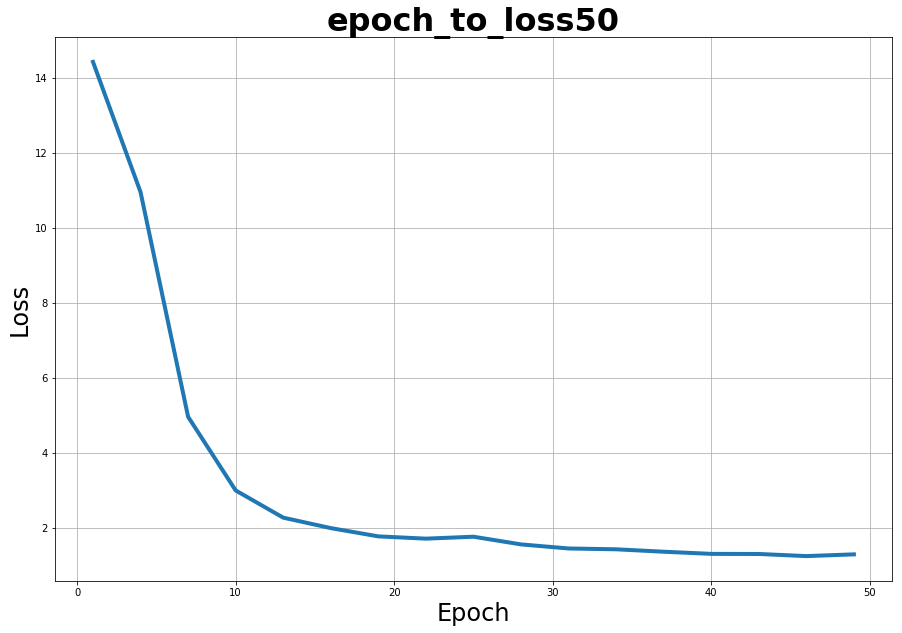

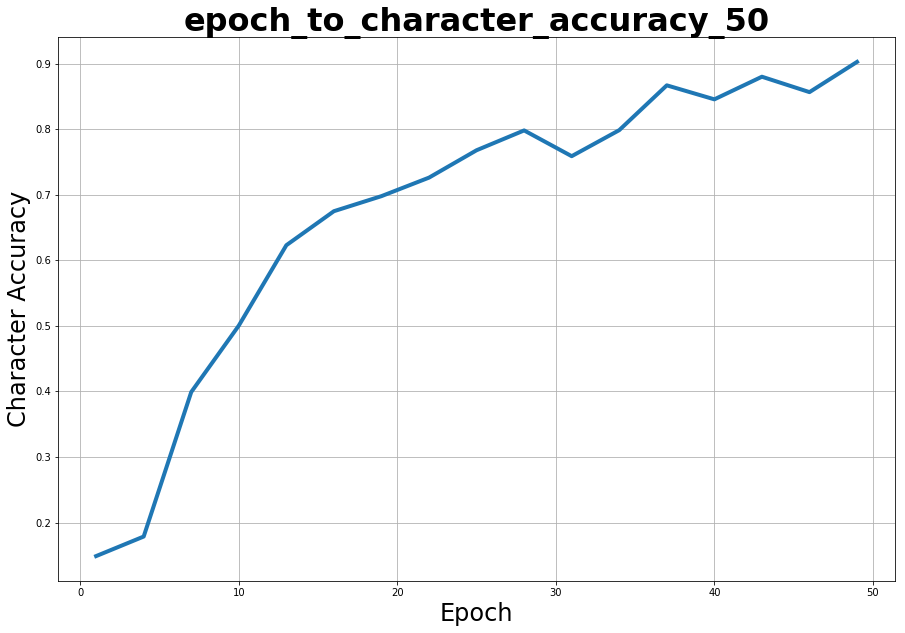

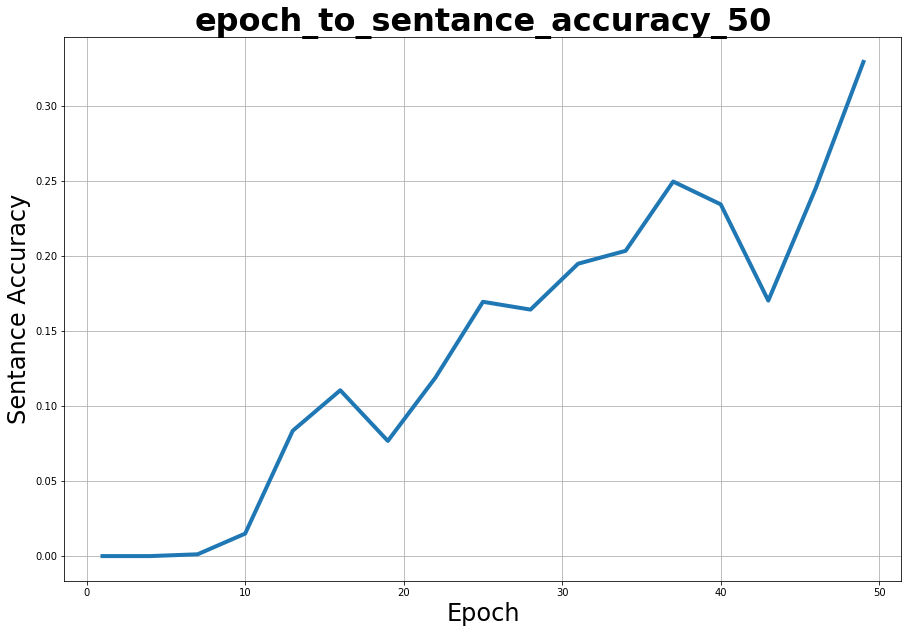

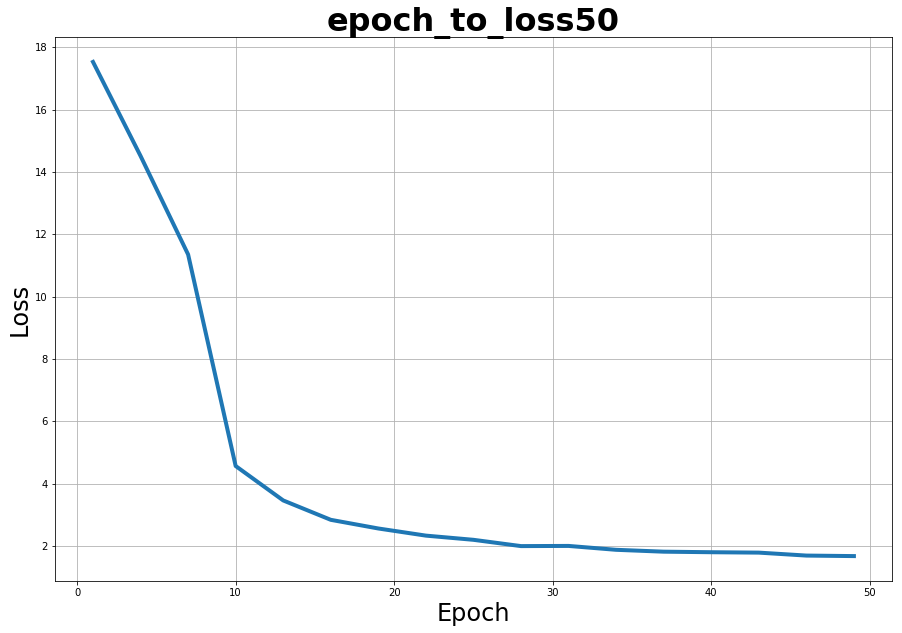

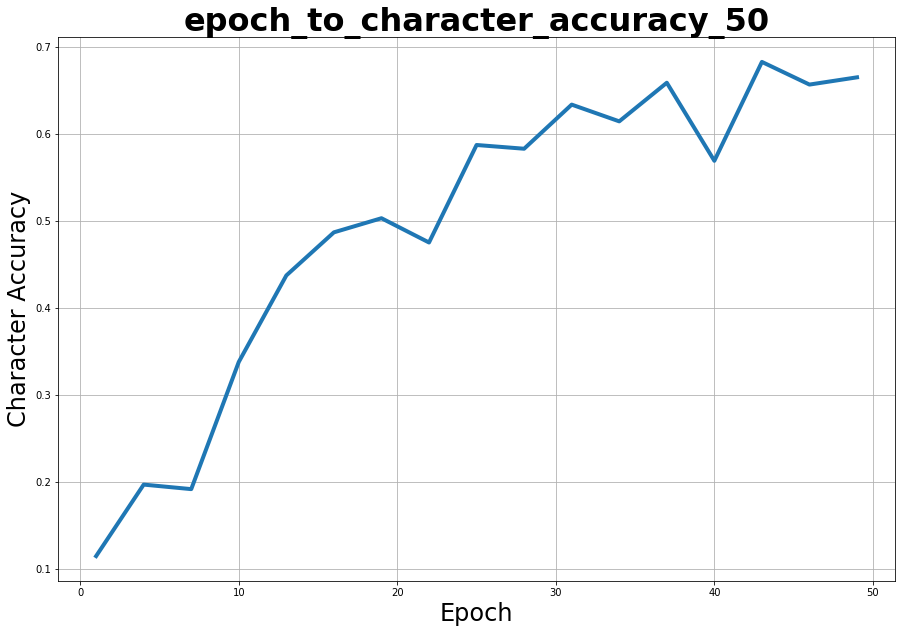

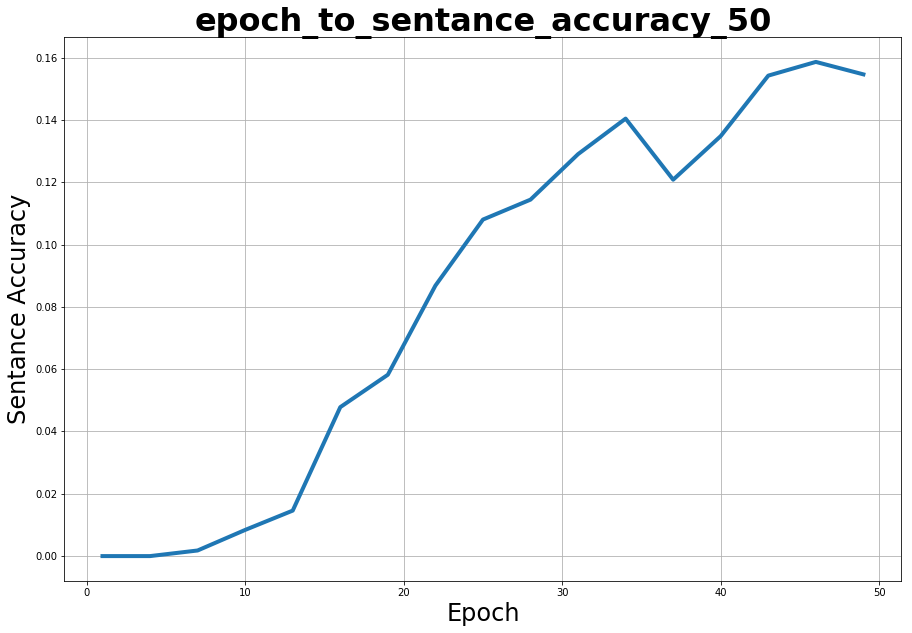

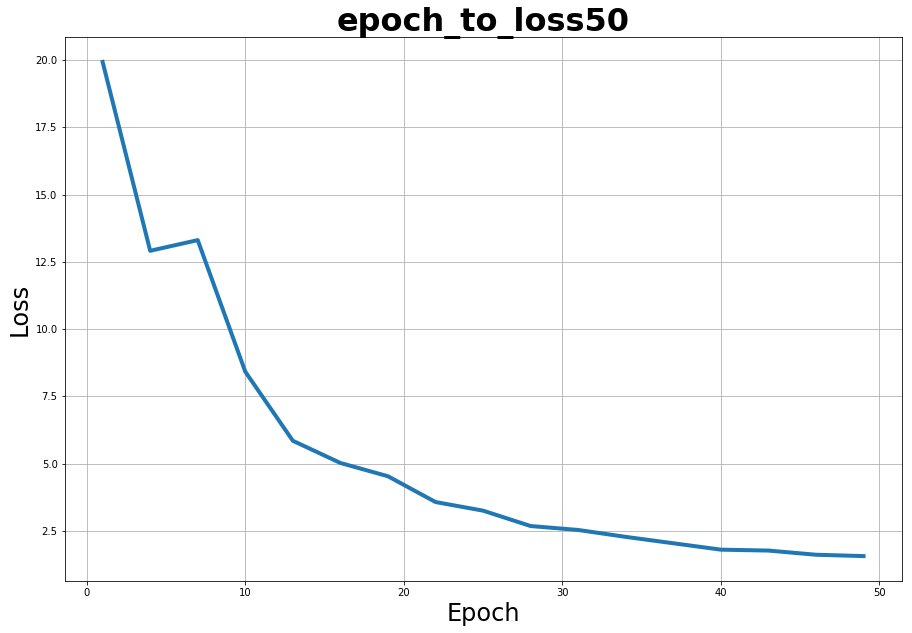

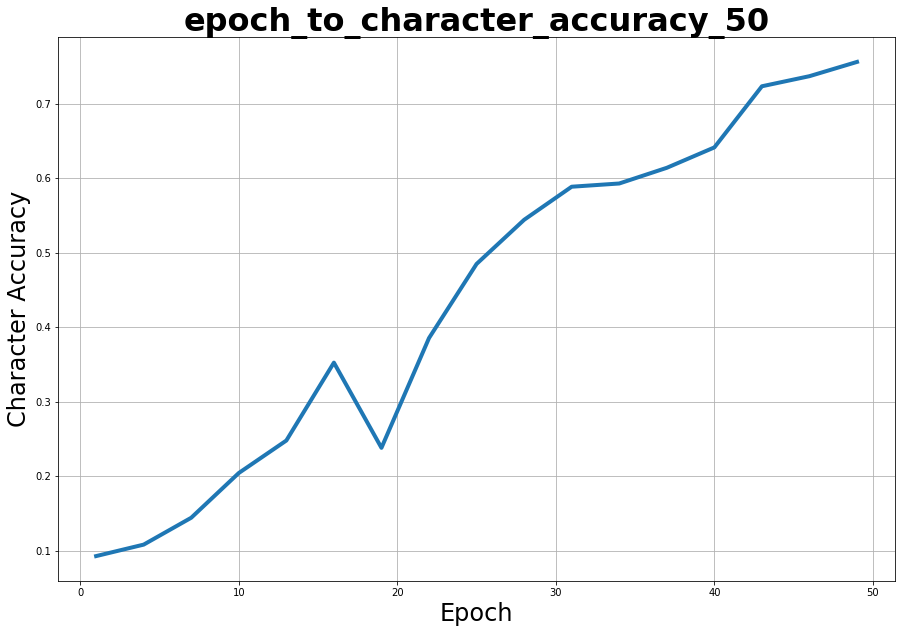

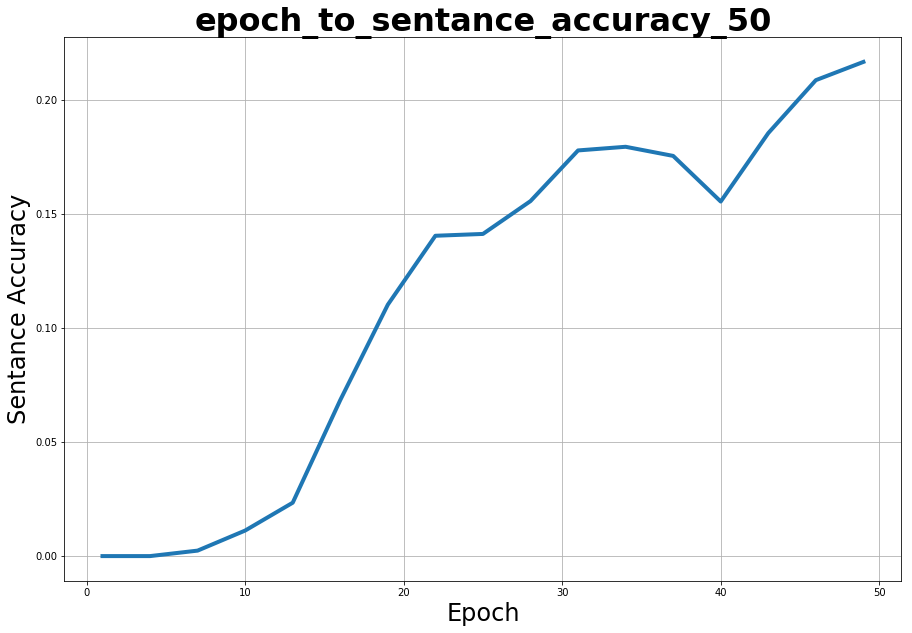

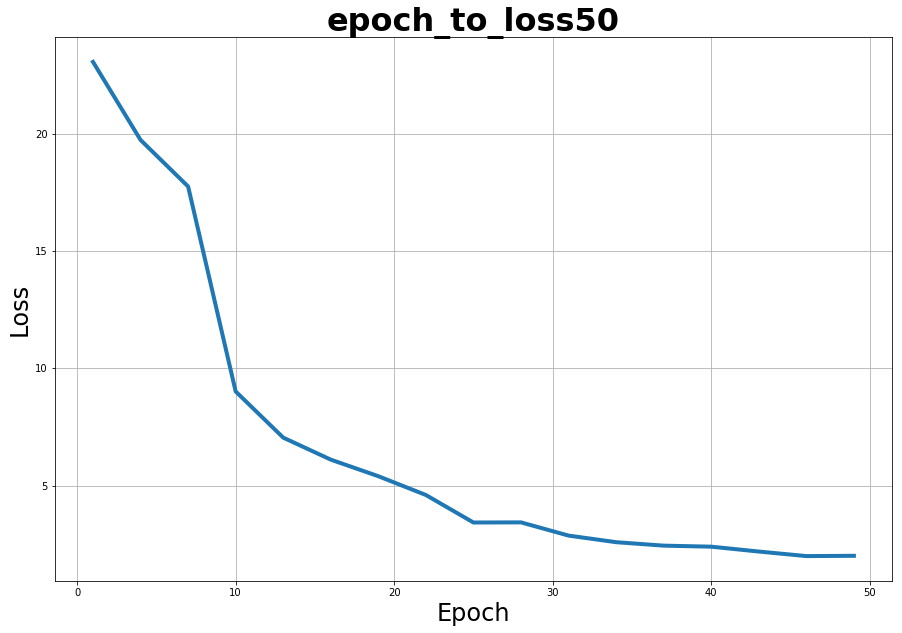

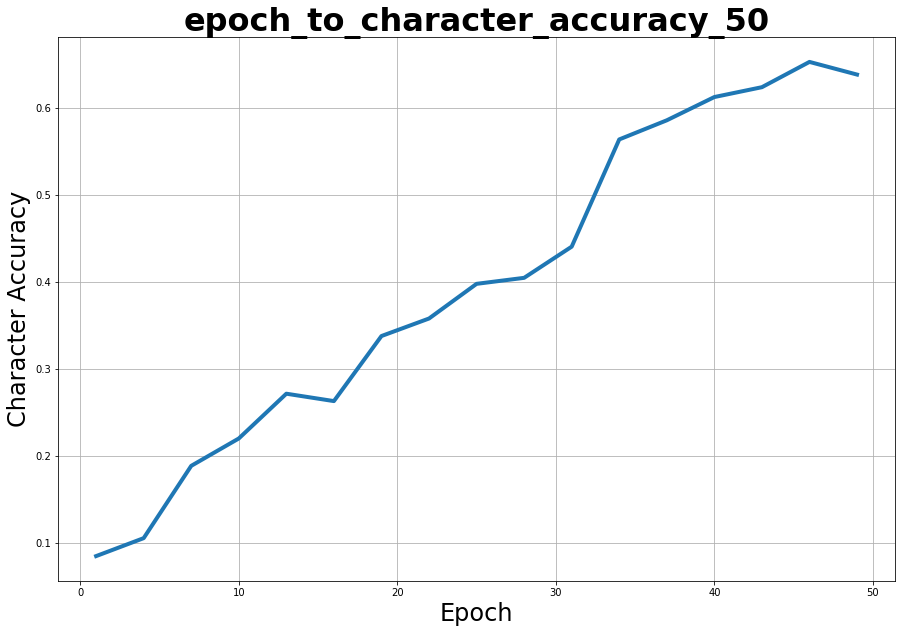

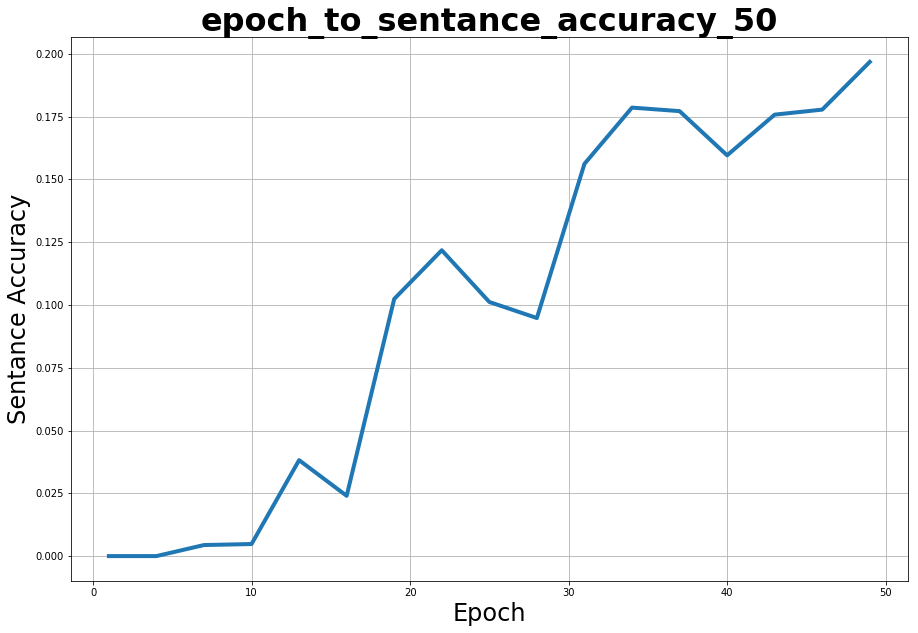

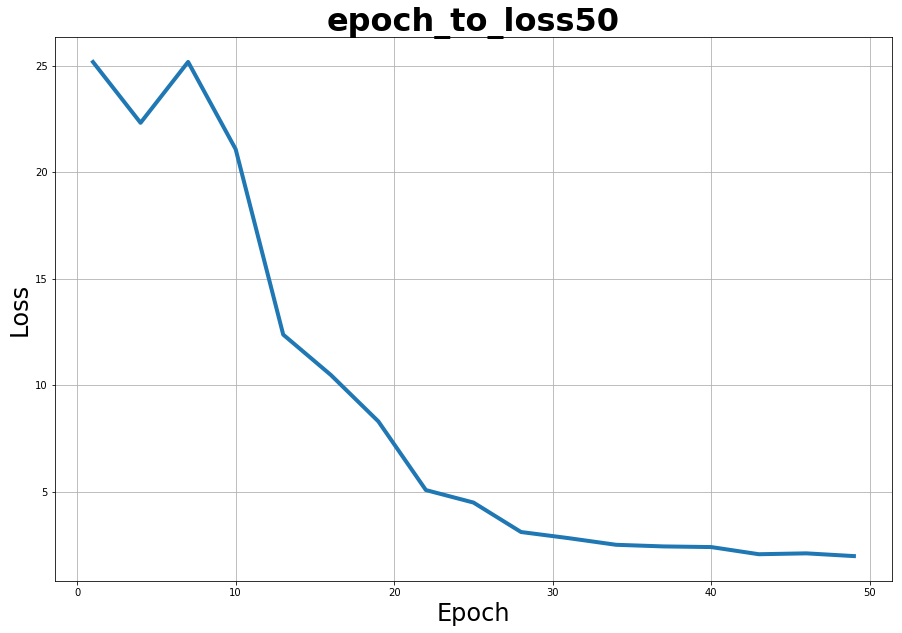

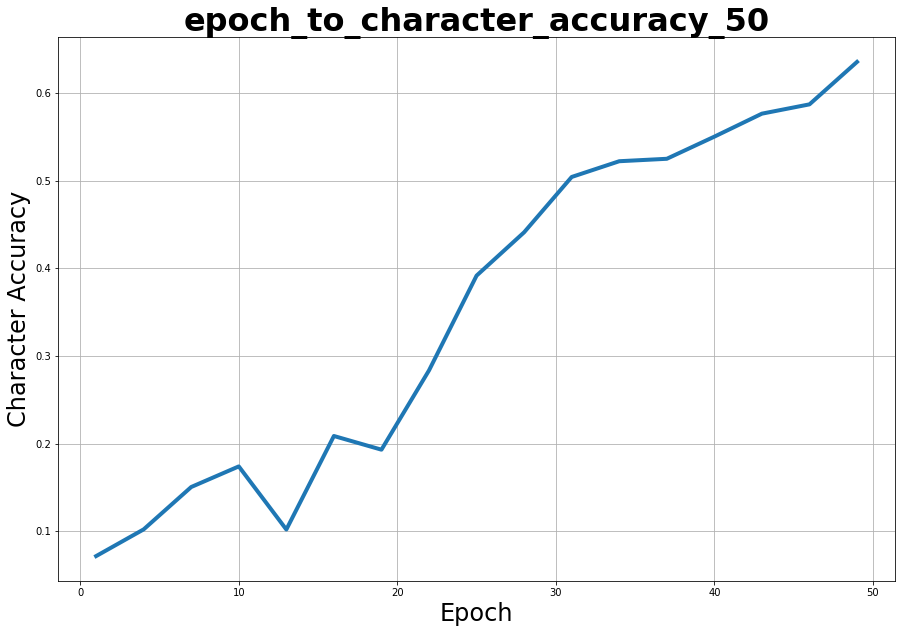

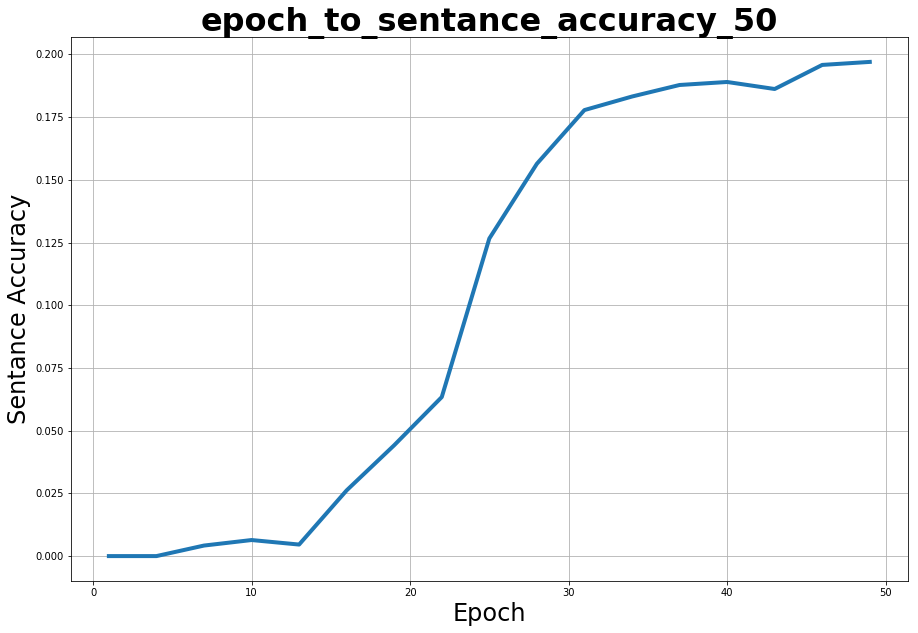

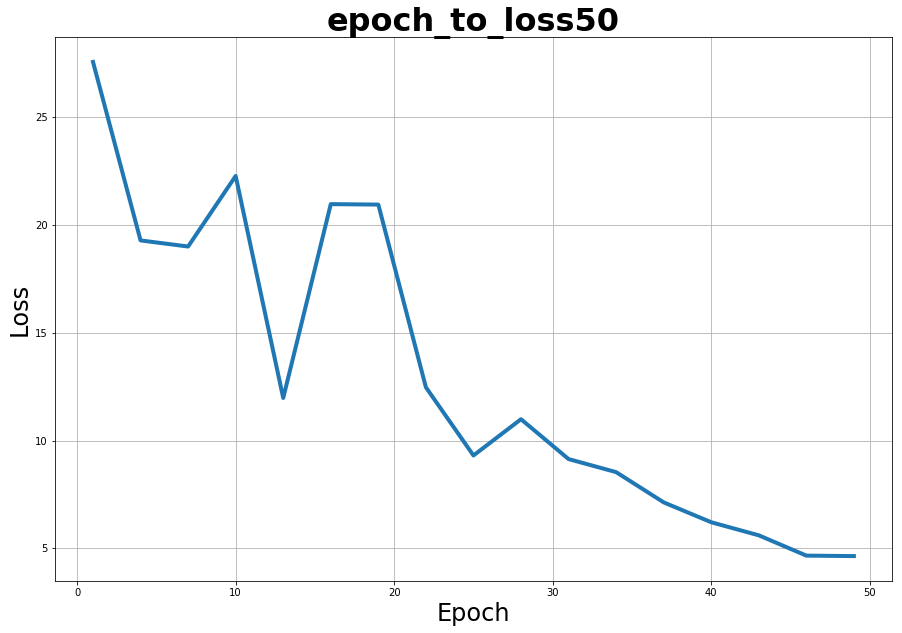

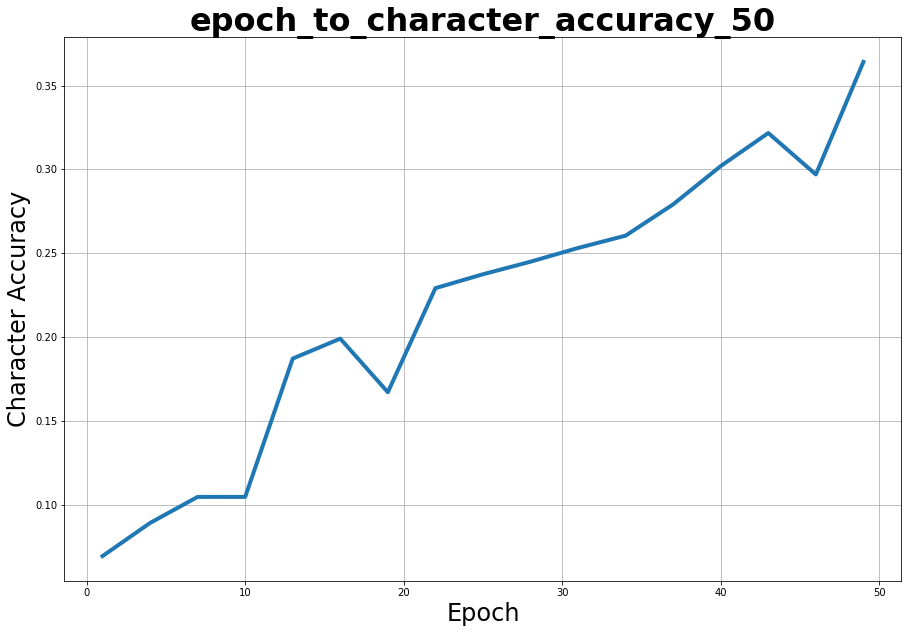

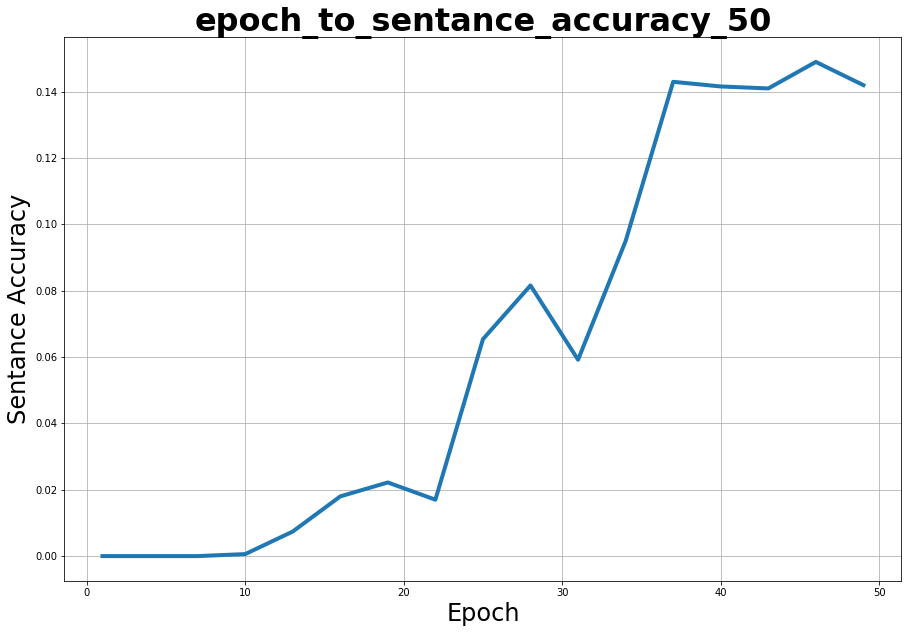

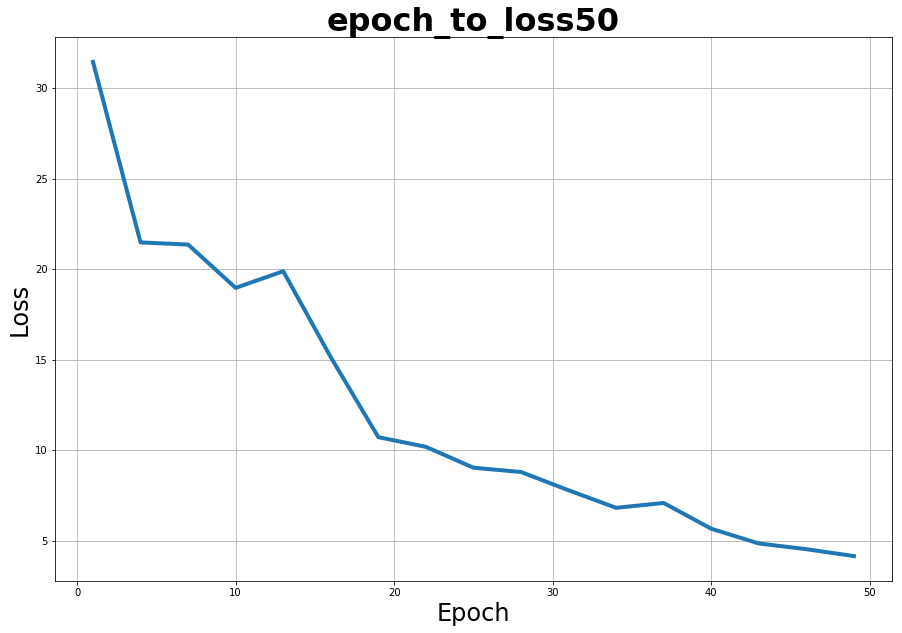

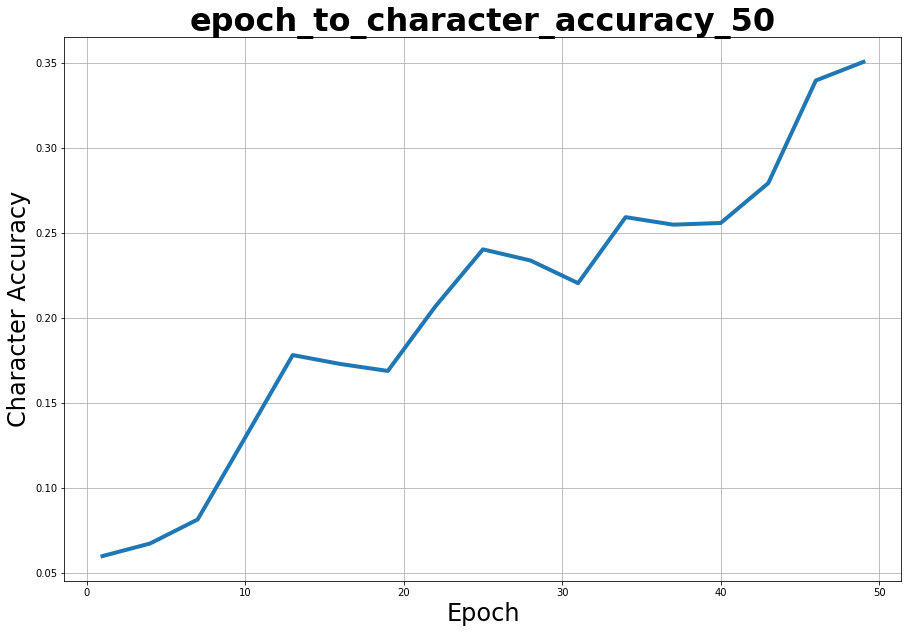

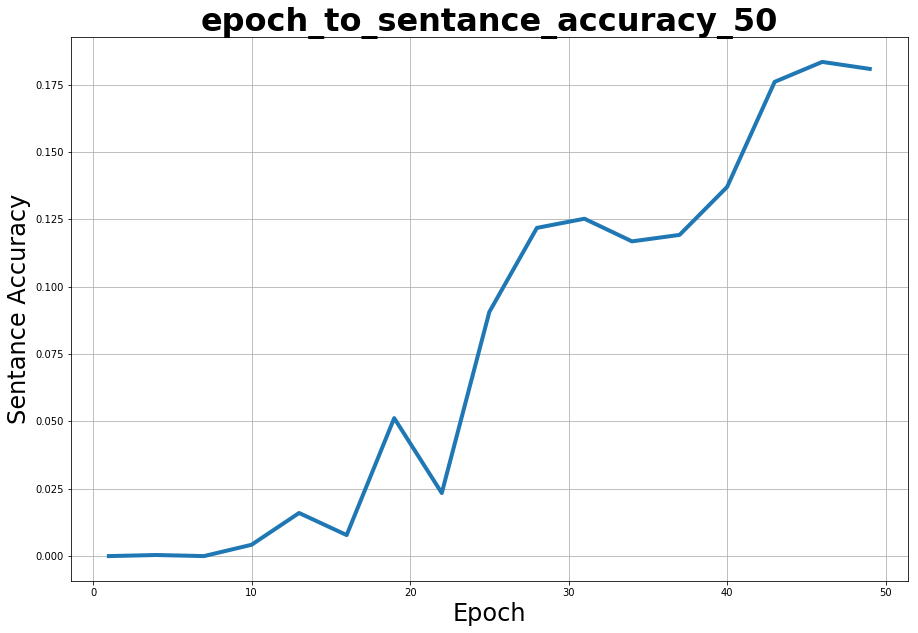

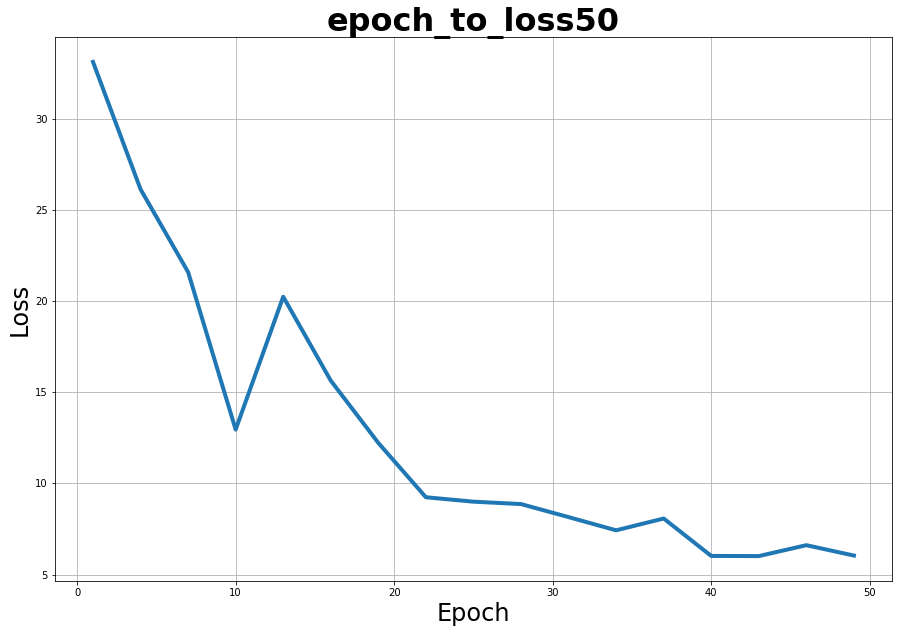

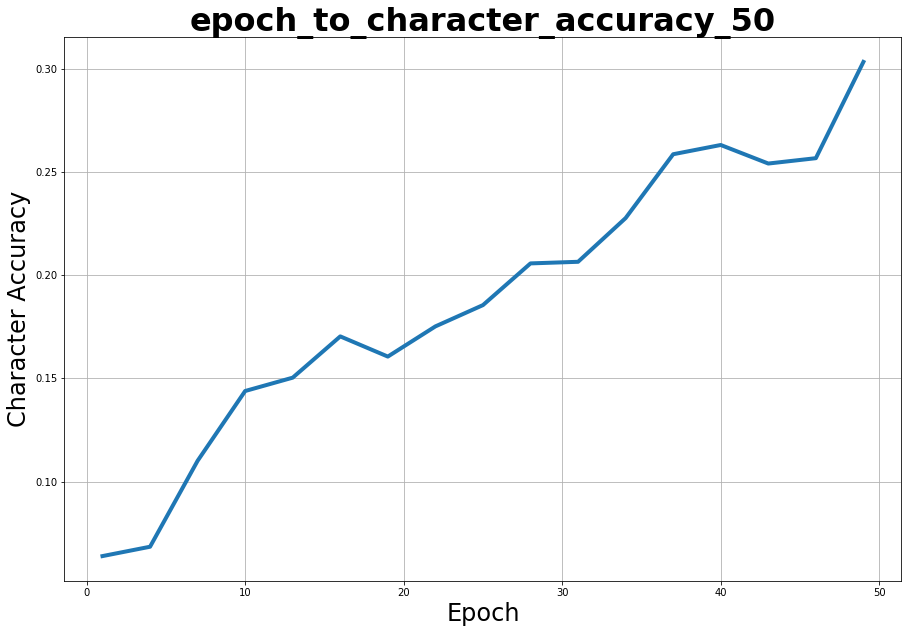

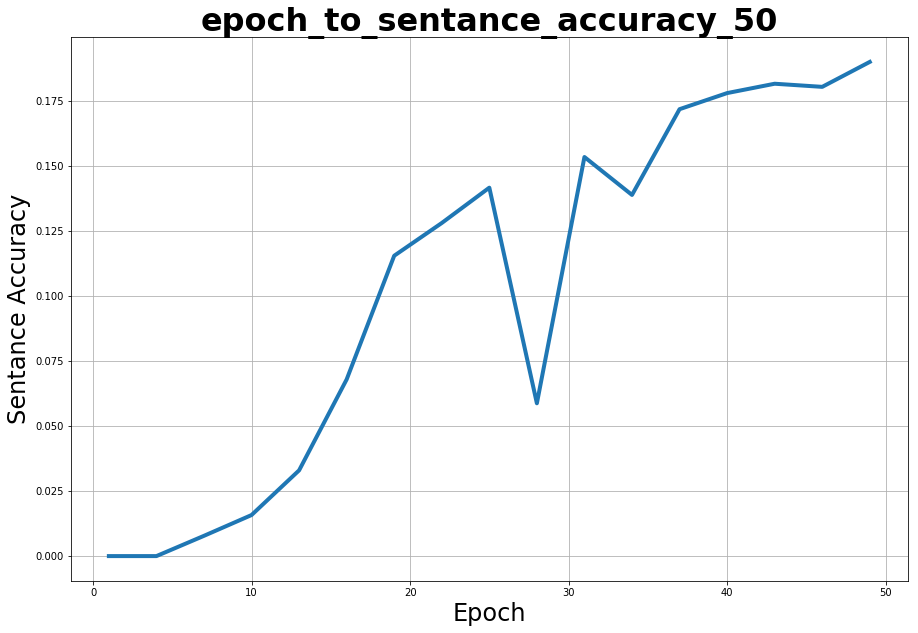

In [4]:
for i in N:
    print("N : %d" % i)
    train_path = "data/bracket_rand/Length/N" + str(i) + "_data_train.txt"
    dev_path = "data/bracket_rand/Length/N" + str(i) + "_data_test.txt"

    src = fields.SourceField()
    tgt = fields.TargetField()
    max_len = 204
    def len_filter(example):
        return len(example.src) <= max_len and len(example.tgt) <= max_len
    train = torchtext.data.TabularDataset(
        path=train_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    dev = torchtext.data.TabularDataset(
        path=dev_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    src.build_vocab(train)
    tgt.build_vocab(train)
    input_vocab = src.vocab
    output_vocab = tgt.vocab

    weight = torch.ones(len(tgt.vocab))
    pad = tgt.vocab.stoi[tgt.pad_token]
    loss = Perplexity(weight, pad)
    if torch.cuda.is_available():
        loss.cuda()
    
    optimizer = "Adam"
    hidden_size = 50
    bidirectional = True

    seq2seq = None
    encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                         bidirectional=bidirectional, variable_lengths=True)
    decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                         dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                         eos_id=tgt.eos_id, sos_id=tgt.sos_id)
    seq2seq = Seq2seq(encoder, decoder)
    if torch.cuda.is_available():
        seq2seq.cuda()

    for param in seq2seq.parameters():
        param.data.uniform_(-0.08, 0.08)

    # train
    t = SupervisedTrainer(loss=loss, batch_size=32,
                          checkpoint_every=50,
                          print_every=100,
                          hidden_size=hidden_size,
                          path="length_to_error_rate/rand_N" + str(i))

    seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=50, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

    best_character_accuracy = 0
    best_sentance_accuracy = 0
    for i,j in zip(character_accuracy_list, sentance_accuracy_list):
        if best_character_accuracy < i:
            best_character_accuracy = i
        if best_sentance_accuracy < j:
            best_sentance_accuracy = j

    character_error_rate.append(1 - best_character_accuracy)
    sentance_error_rate.append(1 - best_sentance_accuracy)
    
    torch.save(seq2seq.state_dict(), 'log/pth/rand_N' + str(i) + '_model_save.pth')

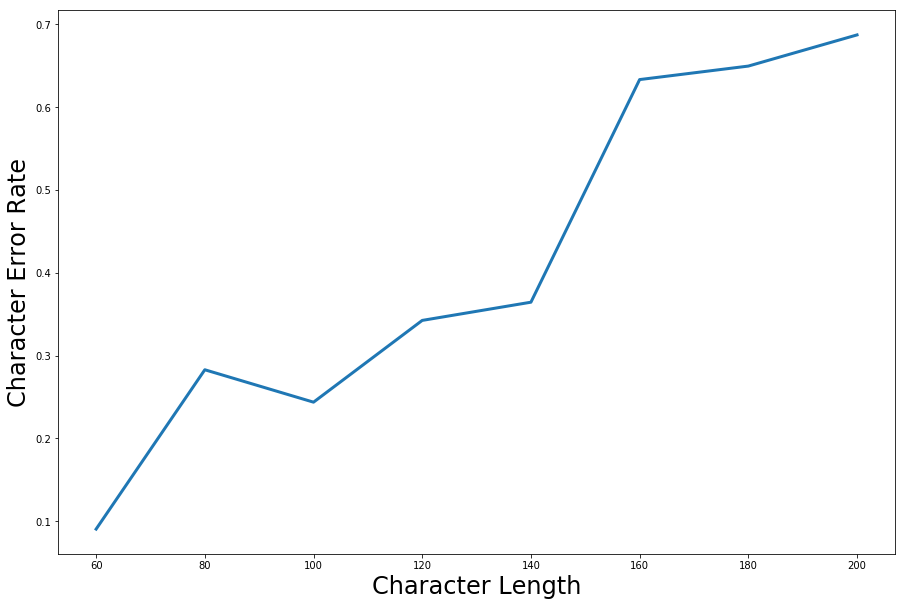

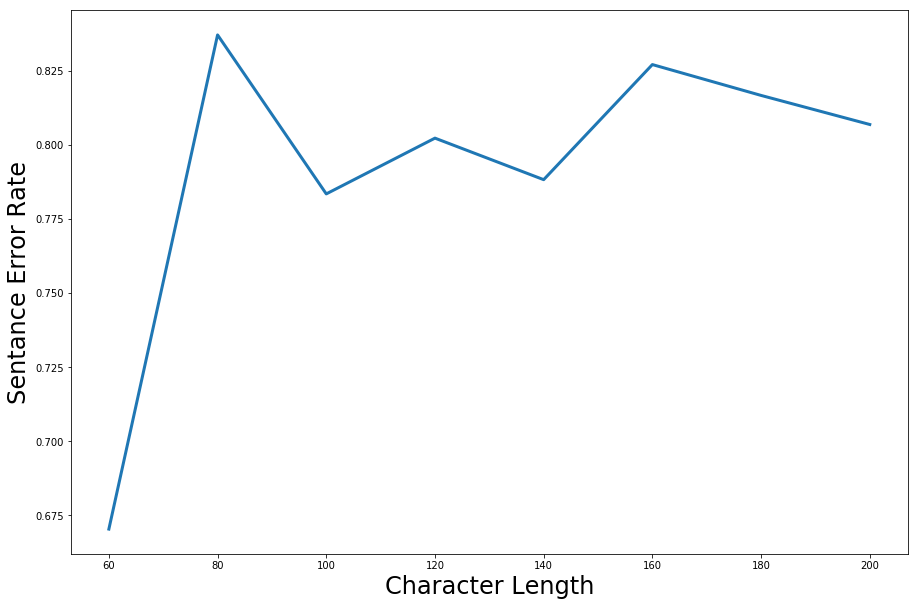

In [6]:
plt.figure(figsize=(15,10))
plt.plot(N, character_error_rate, LineWidth=3)
plt.xlabel('Character Length', fontsize=24)
plt.ylabel('Character Error Rate', fontsize=24)
plt.savefig('log/plot/length_to_error_rate/bracket_rand_length_to_character_error_rate.png')

plt.figure(figsize=(15,10))
plt.plot(N, sentance_error_rate, LineWidth=3)
plt.xlabel('Character Length', fontsize=24)
plt.ylabel('Sentance Error Rate', fontsize=24)
plt.savefig('log/plot/length_to_error_rate/bracket_rand_length_to_sentance_error_rate.png')